In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

In [ ]:
!pip install opencv-python  protobuf==3.20.* tensorflow==2.7.0 tensorflow-estimator==2.7.0 keras scikeras tqdm google-auth==2.6.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0

In [ ]:
pip freeze

In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.preprocessing import image

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
from tensorflow.python.framework.config import set_memory_growth
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Instructions for updating:
non-resource variables are not supported in the long term


2023-10-05 07:21:03.208730: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-05 07:21:03.252278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-05 07:21:03.252466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
# Read image
image2 = cv2.imread("./Grid_Image.jpeg")
image2 = image2[:,:,::-1]
image2 = cv2.resize(image2, (224, 224))
image2 = image2.reshape((1,) + image2.shape)

In [5]:
def add_gaussian_noise(img_inp):
    # Add Gaussian noise to the image
    noise = np.random.normal(0, 1000, img_inp.shape).astype(np.uint8)  # You can adjust the standard deviation
    noisy_image = np.clip(img_inp + noise, 0, 255)  # Clip values to [0, 255] range

    return noisy_image

(1, 224, 224, 3)


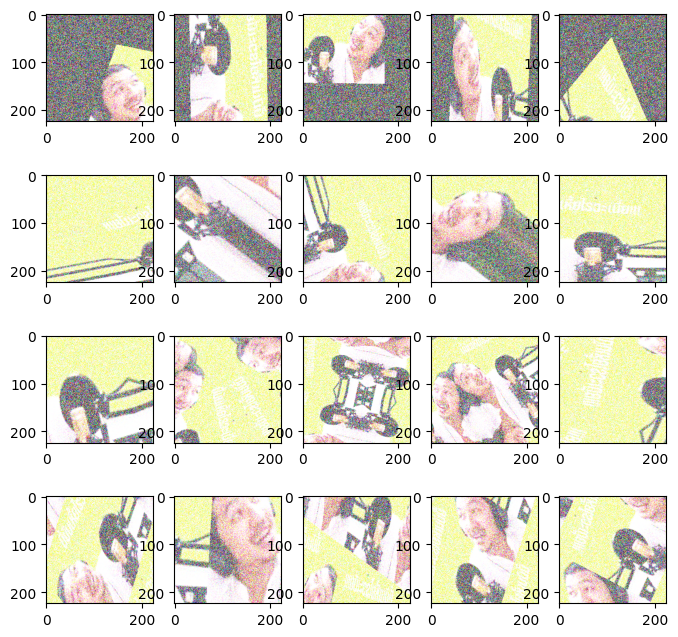

In [11]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

print(image2.shape)
fig = plt.figure(figsize=(8, 8))
counter = 1

# Define parameters
Npic = 6
rotation_range = 90
width_shift_range = 0.5
height_shift_range = 0.5
shear_range = 0.2
zoom_range = 0.5
horizontal_flip = True

# Define ImageDataGenerator with parameters
for m in fill_method:
  datagen = ImageDataGenerator( 
                                preprocessing_function=add_gaussian_noise,
                                rotation_range=rotation_range,
                                width_shift_range=width_shift_range,
                                height_shift_range=height_shift_range,
                                shear_range=shear_range,
                                zoom_range=zoom_range,
                                horizontal_flip=horizontal_flip,
                                fill_mode = m
                              )

  # Creates our batch of one image
  pic = datagen.flow(image2, batch_size = 1)
  for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    fig.add_subplot(4, 5, counter)
    plt.imshow(im_result)
    counter+=1